In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv(r"C:\Users\bhuvp\Downloads\diabetes (3).csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
for i in df.columns:
    print(df[i].value_counts())

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
2

In [9]:
def remove_outliar(data,col):
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        mini = q1 - 1.5*iqr
        maxi = q3 + 1.5*iqr
        return data[(data[col]>=mini) & (data[col]<=maxi)]

In [10]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [11]:
for i in x.columns:
    cleaned_data = remove_outliar(df,i)

In [12]:
x_cleaned = cleaned_data.drop('Outcome',axis=1)
y_cleaned = cleaned_data['Outcome']

In [13]:
x_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

## x.columns

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_cleaned,y_cleaned,test_size=0.2,random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(x_train)

StandardScaler()

In [18]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
import pickle

In [20]:
df[df['Age']==51]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
236,7,181,84,21,192,35.9,0.586,51,1
259,11,155,76,28,150,33.3,1.353,51,1
285,7,136,74,26,135,26.0,0.647,51,0
458,10,148,84,48,237,37.6,1.001,51,1
517,7,125,86,0,0,37.6,0.304,51,0
658,11,127,106,0,0,39.0,0.190,51,0


In [28]:
svc = SVC(probability=True)

In [29]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [30]:
accuracy_score(y_test,svc.predict(x_test))*100

73.02631578947368

In [34]:
accuracy_score(y_train,svc.predict(x_train))*100

84.1845140032949

In [44]:
svc.predict_proba([[8,160,60,1,0,25.9,0.672,32]])

array([[0.48478832, 0.51521168]])

In [ ]:
svc.

<Axes: xlabel='Pregnancies', ylabel='Count'>

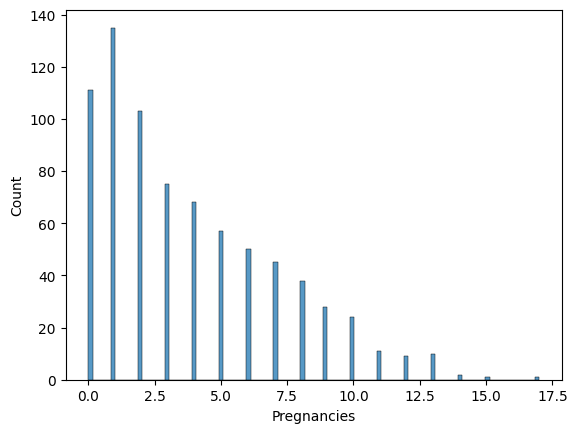

In [31]:
sns.histplot(df['Pregnancies'],bins=100)

In [32]:
svc.predict_proba([[1,89,66,23,94,28.1,0.167,21]])[0][1]

0.5152116778686948

In [ ]:
lr.predict(x_test)

In [60]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [59]:
pickle.dump(svc,open('Diabetes.pkl','wb'))

In [53]:
svc.predict_proba(ss.transform([[11,150,76,30,150,203,5,30]]))

C:\Users\bhuvp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48478832, 0.51521168]])

In [61]:
svc.predict_proba(ss.transform([[11,143,94,33,146,36.6,0.254,51]]))

C:\Users\bhuvp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.2171462, 0.7828538]])